# GEOL 3888 Report
Anna Freudenstein SID: 490251254

# Abstract

In this report I have used Python to examine a dataset showing the global distribution and age of iron deposits. In so doing it is possible to associate magnesium deposits with geological features, allowing us make hypotheses as to the origin and formation process of these iron deposits. I examine both rich iron deposits with a ppm of greater than 250000, as well as all recorded iron deposits. I also carried out a closer examination of the North American region due to the density of data points in this region. The creation of these charts was carried out using Python analysis.

# Methods

The Fe data was taken from EarthChem.org, an online repository for geochemical data.

After checking the iron data, I determined that no obvious outliers were present in the geographical data (i.e. inaccurate latitude and longitude values). I therefore did not need to use a filtering method.

However, in order to consider only rich iron deposits I eliminated the data where the ppm of Fe was under 250000. This made the mapped data more manageable and easy to interpret, while also removing data points where the amount of iron present was negligible and far below the cut-off grade (usually 50%, or 500000ppm). I did this by using a method presented in Chandra et al 2019, which I expanded to use on the whole dataset. 

The concentration of values over North America made making a good interpretation of this region difficult. I therefore made a map restricted to North America, using the filtering method from for removing outlying values (Chandra et al 2019), adapted for the longitude and latitude of North America. 

# Interpretation

The global view (fig. 1) shows us most obviously that the highest concentration of Fe deposits can be found in North America. Other smaller concentrations can be found along the Andes, the Hawaiian island chain, in central Europe, in the Philippines and in the central Antarctic Peninsula. It also appears that these deposits are concentrated along plate boundaries and tectonically or volcanically active areas of the globe. Examples of this are the concentration of deposits in the volcanically active regions of Hawaii and Antarctica, as well as the deposits along plate boundaries in South America and the Philippines. However, the high concentrations of iron in North America do not seem to show this connection to such areas. Notable is the lack of data points in Australia, especially in Western Australia.

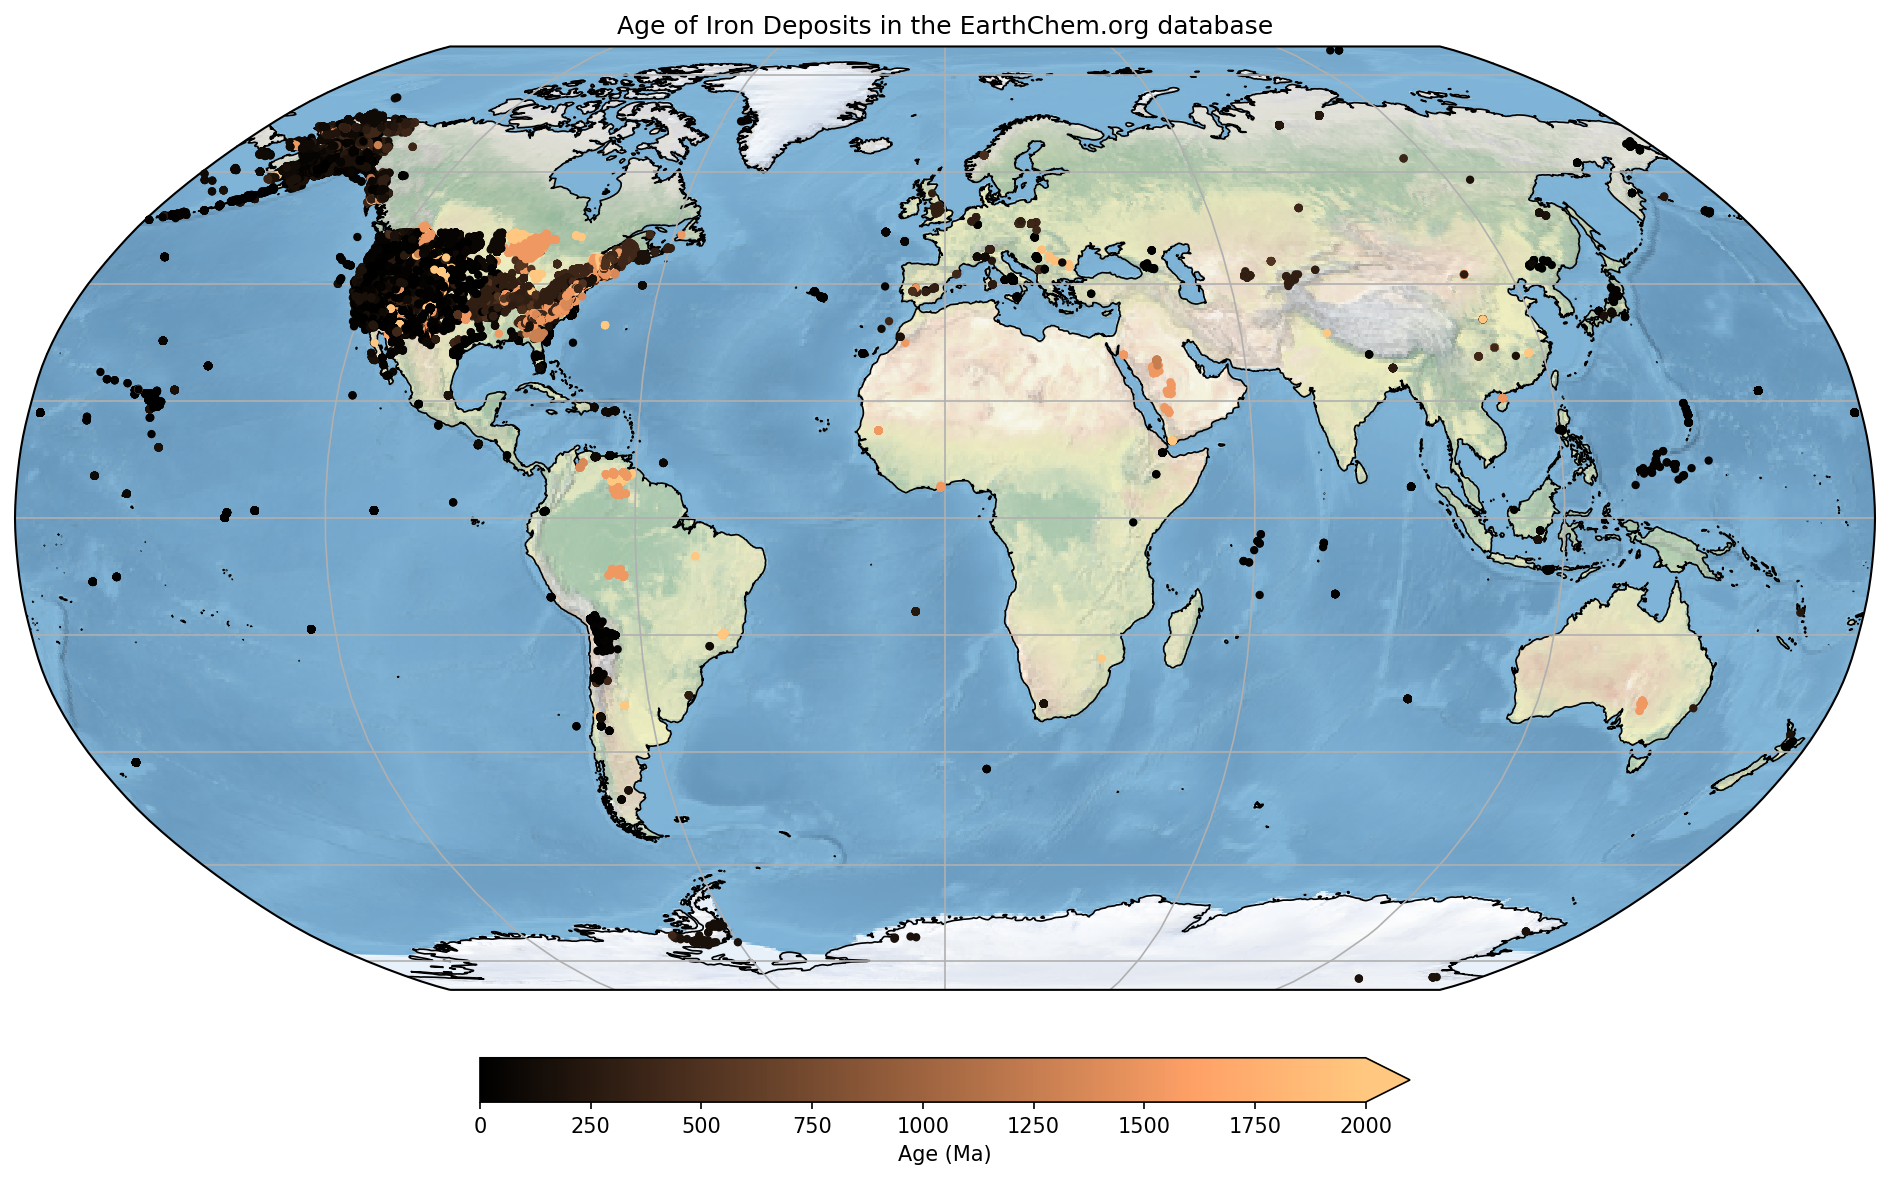

The age of the deposits is almost all under 250 Ma. The young age of these deposits and their concentration along current plate boundaries and tectonically or volcanically active areas of the globe illustrates the relationship between tectonic activity and the formation of iron deposits. For example, iron can be deposited in certain types of magmas and if mafic layered intrusions.

Many of the points in fig.1 depict iron deposits below the cut-off grade. As we can see below in fig. 2, most of the Fe deposits with a ppm > 250000 are concentrated in North America, with scattered deposits in the Magnitogorsk region of Russia, as well as points in South America, among others.

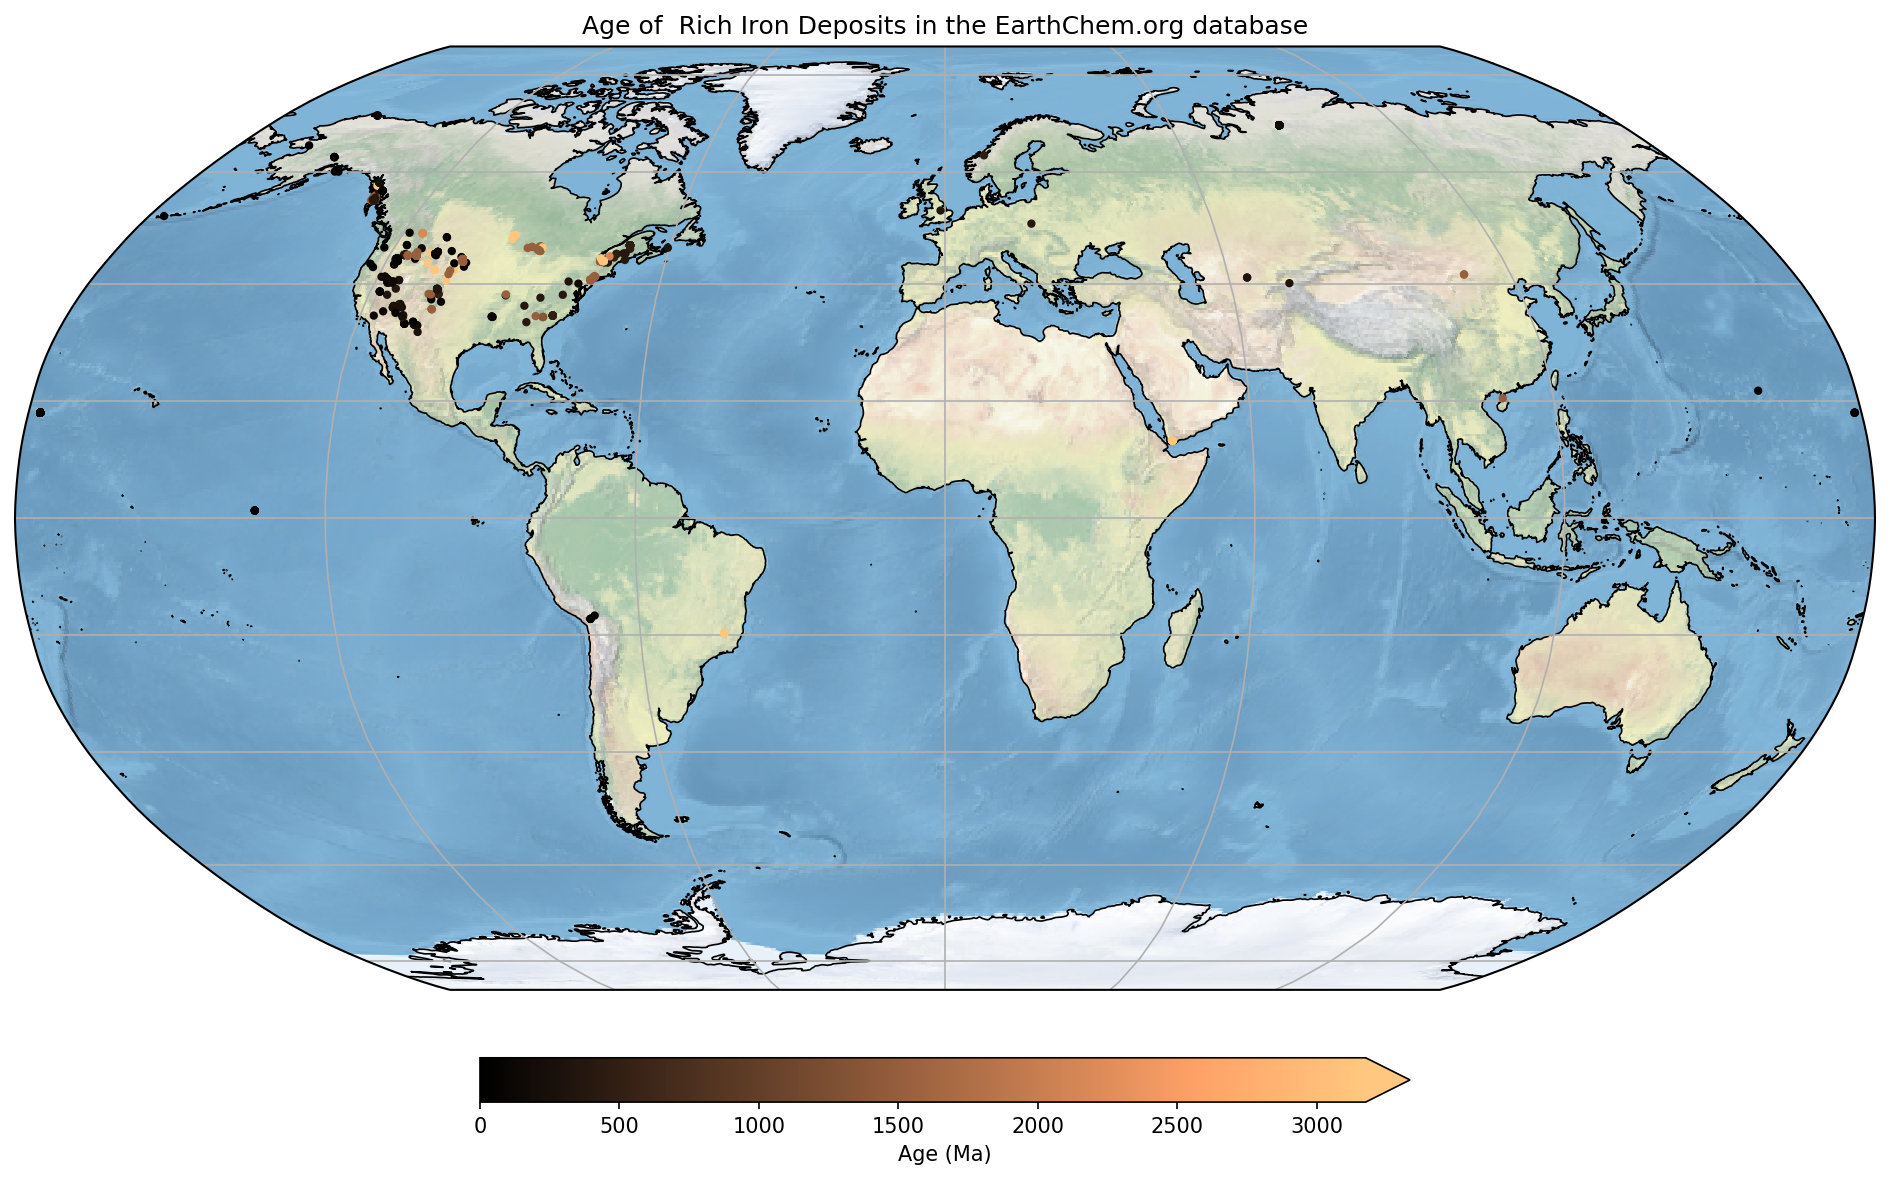

Many of these deposits are older than the average age of deposits (611 Ma for this dataset). Older deposits such as the Brazilian Carajas deposits that are generally not related to tectonically active areas are likely part of banded iron formations, of which the largest deposits generally formed during the Palaeoproterozoic.

Looking only at North America (fig. 3, below), we can see larger (and therefore older) points in the top of the image, that likely also represent banded iron formation deposits, specifically at Lake Superior. However, this leaves many of the young west coast iron deposits unexplained. They do not lie specifically on a plate boundary or tectonically active regions, and we cannot explain their origin without more data than is given in this dataset.

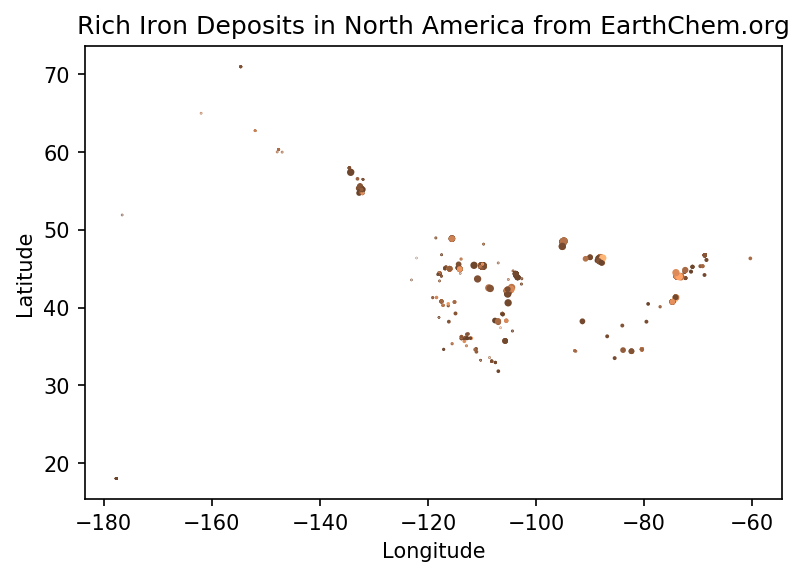




# Conclusion

These maps showing iron distribution and age allow us to locate older deposits that are likely the result of banded iron formations. Further, more specific analysis (for example, using machine learning) would need to be done in order to determine the likely provenance of the many smaller deposits, especially in North America. However, the lack of data points in locations such as Western Australia, where very rich iron deposits are located, would point to data set that is not entirely representative, making any interpretations we could draw from analysing this data questionable.


In [92]:
#Code
#Mapping global Fe data

#NUMerical PYthon
import numpy

#Pandas
import pandas

#Plotting
import matplotlib.pyplot as plt 

#Load file
filename = '../data/EarthChemFE.txt'

#Data read-in
chemdata=numpy.loadtxt(filename, delimiter=',')

In [93]:
print(chemdata)
#long, lat, age, Fe
print(chemdata.shape)

[[ 3.87450e+01 -1.06081e+02  2.80000e+01  4.27000e+03]
 [ 3.87450e+01 -1.06081e+02  2.80000e+01  3.79000e+03]
 [ 3.87450e+01 -1.06081e+02  2.80000e+01  4.19000e+03]
 ...
 [ 9.44830e+00 -5.47333e+01  9.27600e+01  1.95000e+04]
 [ 9.44830e+00 -5.47333e+01  9.29900e+01  1.09000e+04]
 [ 9.44830e+00 -5.47333e+01  9.32200e+01  1.14000e+04]]
(164288, 4)


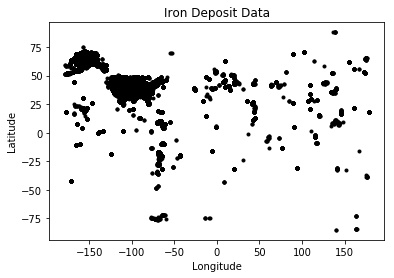

In [94]:
#Plot the lats and lons
plt.plot(chemdata[:,1],chemdata[:,0],'k.')
plt.title('Iron Deposit Data')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

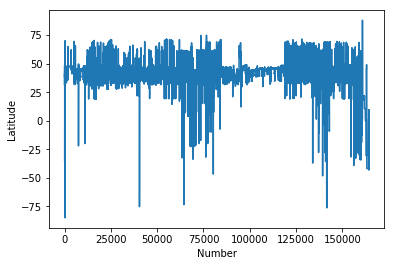

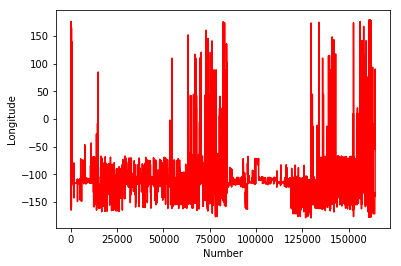

In [95]:
#Checking for outliers
#Plot the Latitudes
plt.plot(chemdata[:,0])
plt.ylabel('Latitude')
plt.xlabel('Number')
plt.show()

#Plot the Longitudes
plt.plot(chemdata[:,1],'r')
plt.ylabel('Longitude')
plt.xlabel('Number')
plt.show()

#No outliers shown, filtering not required

In [120]:
#Global view
#Only variable names altered from Intro_Python_Geo
lats=chemdata[:,0]
longs=chemdata[:,1]
age=chemdata[:,2]
iron=chemdata[:,3]

#rich deposits >25% grade or 250000ppm
longs_rich=longs[iron>250000]
lats_rich=lats[iron>250000]
iron_rich=iron[iron>250000]
print(iron_rich.shape)
print(iron.shape)

numpy.mean(chemdata[:,2])


(1226,)
(164288,)


611.3378947291646

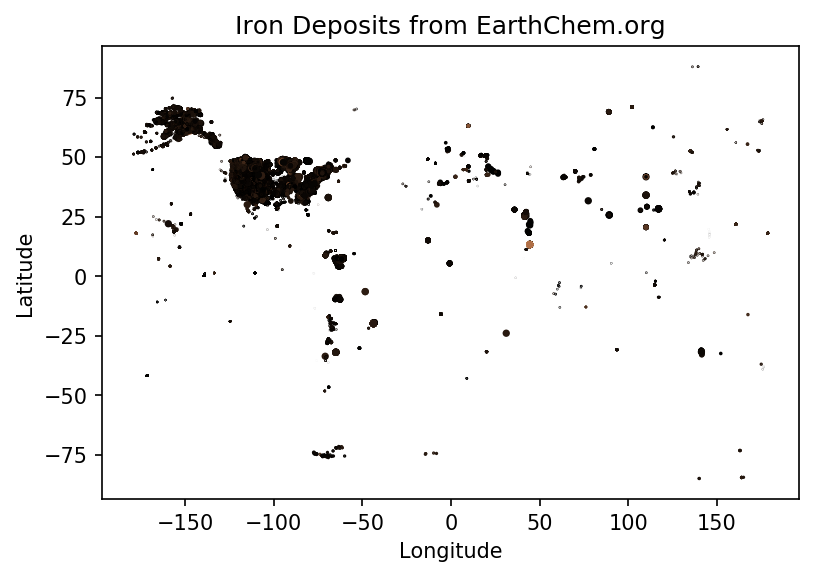

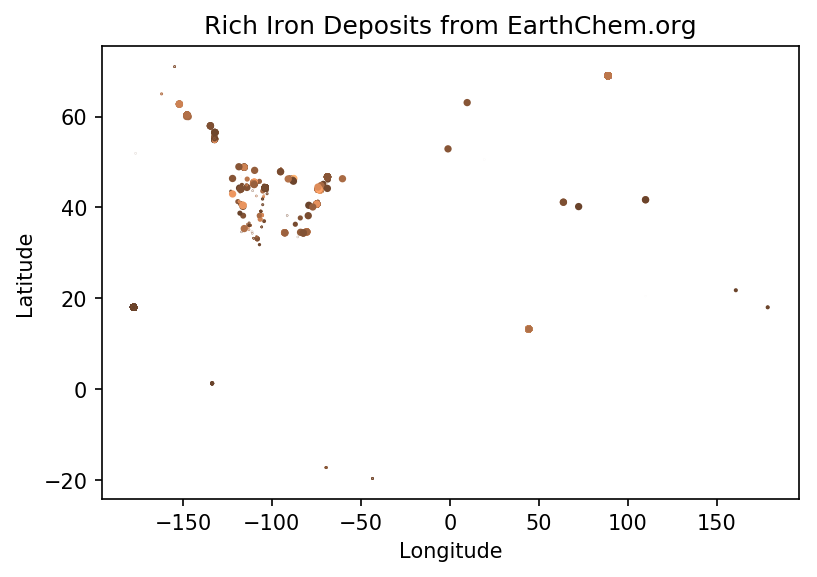

In [97]:
#Plot all values
fig = plt.figure(figsize=(6,4),dpi=150)

plt.scatter(longs,lats,s=age/500,c=iron,vmin=0, vmax=770000,cmap=plt.cm.copper)
plt.title('Iron Deposits from EarthChem.org')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

#Plot rich values
fig = plt.figure(figsize=(6,4),dpi=150)

plt.scatter(longs_rich,lats_rich,s=age/500,c=iron_rich,vmin=0, vmax=770000,cmap=plt.cm.copper)
plt.title('Rich Iron Deposits from EarthChem.org')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

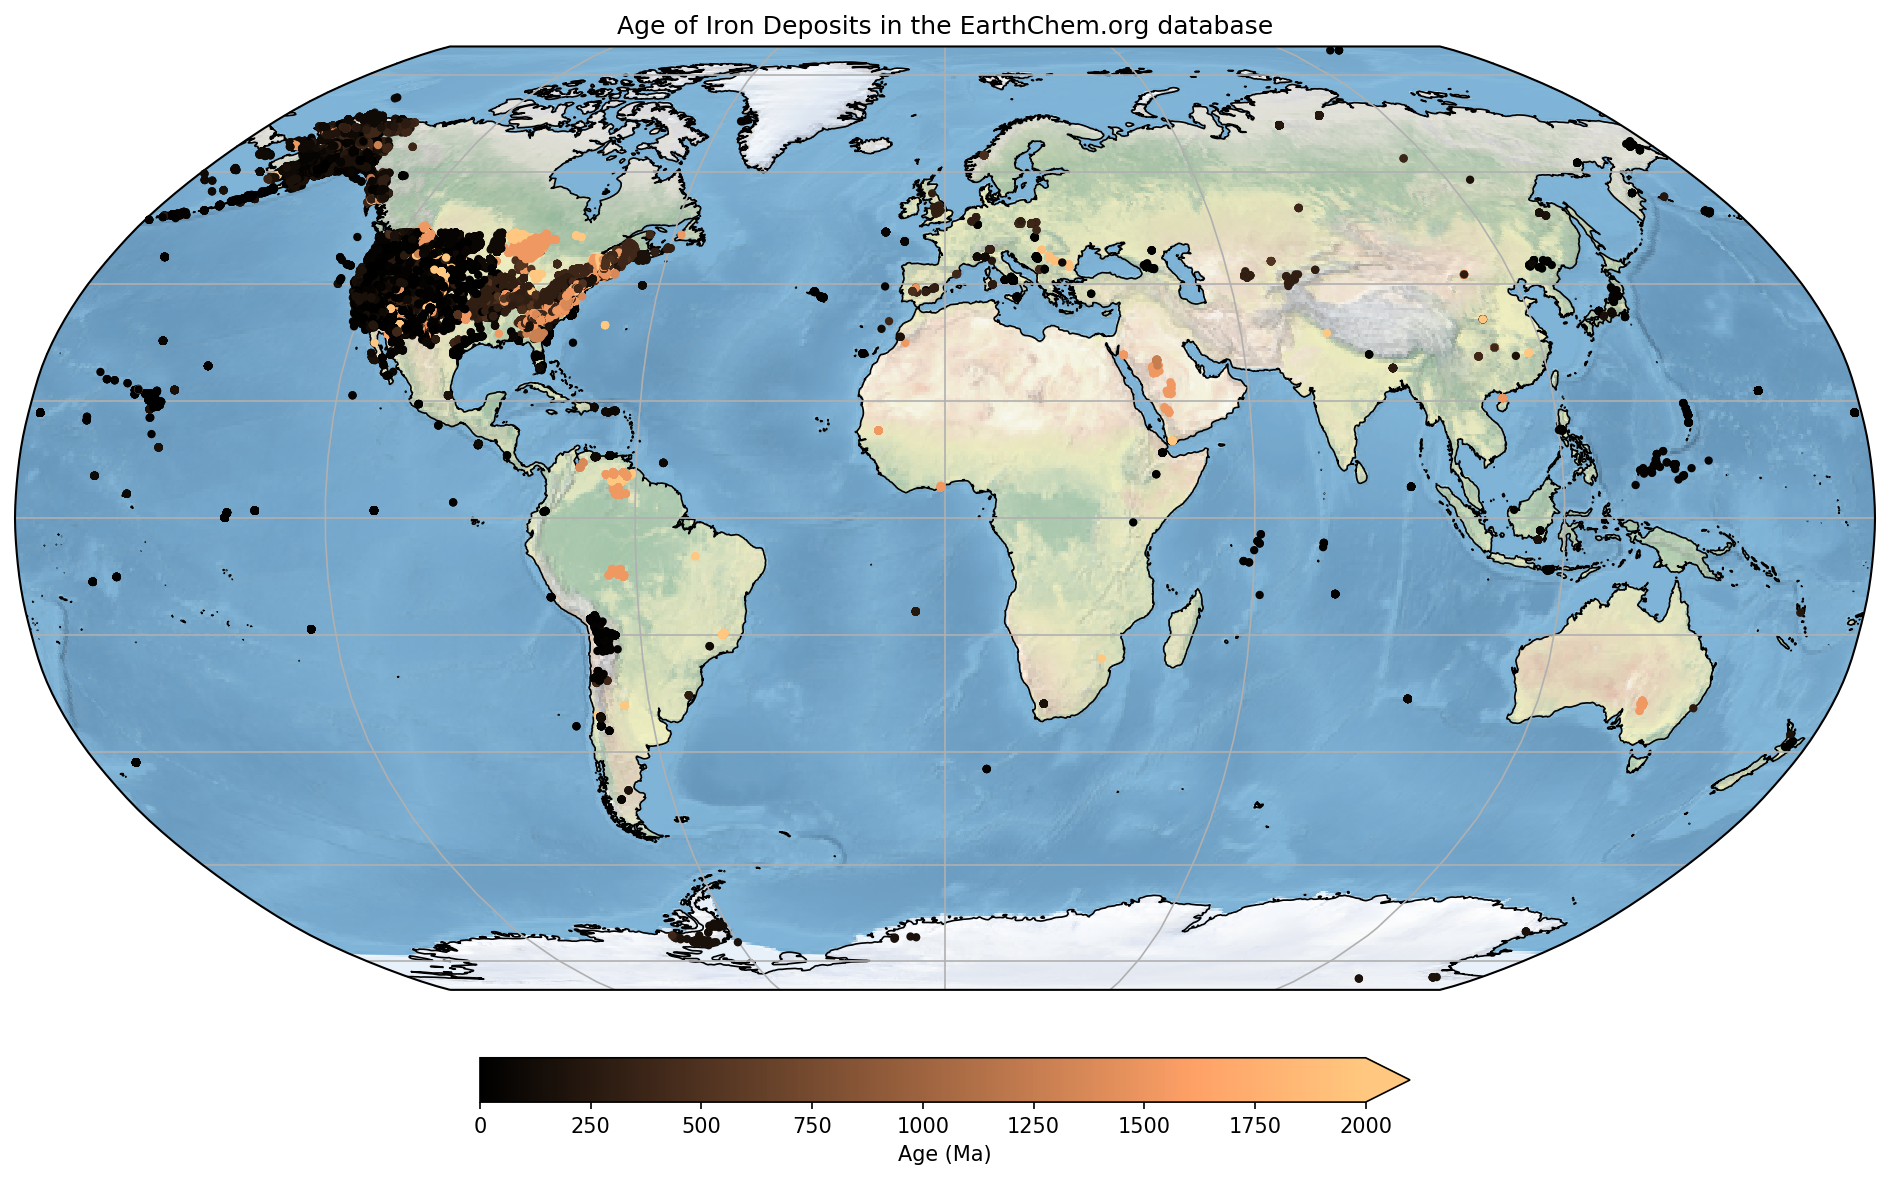

In [104]:
# Global improved, all values

#Cartopy
import cartopy.crs as ccrs

#Variables
lats=chemdata[:,0]
longs=chemdata[:,1]
age=chemdata[:,2]

#######
## Make the figure
#######

#Create a figure object
fig = plt.figure(figsize=(16,12),dpi=150)

#Make a map projection to plot on.
ax = plt.axes(projection=ccrs.Robinson())

#Add some Earth-specific details (from the cartopy package)
ax.set_global()
ax.coastlines('50m', linewidth=0.8)
ax.stock_img()
ax.gridlines()

#Make a scatter plot of the data coloured by age. 
#Restrict the colour range between 0 and 2000
#And also set the scatter plot as a variable 'mapscat' so we can reference it later
mapscat=ax.scatter(longs,lats,marker=".",c=age,vmin=0,vmax=2000,transform=ccrs.Geodetic(),zorder=4,cmap=plt.cm.copper)

#Make a Colorbar
cbar=plt.colorbar(mapscat, ax=ax, orientation="horizontal", pad=0.05, fraction=0.15, shrink=0.5,extend='max')
cbar.set_label('Age (Ma)')

# Add a map title, and tell the figure to appear on screen
plt.title('Age of Iron Deposits in the EarthChem.org database')
plt.show()


In [109]:
# Global improved, rich values

#Cartopy
import cartopy.crs as ccrs

#Variables
lats=chemdata[:,0]
longs=chemdata[:,1]
age=chemdata[:,2]

longs_rich=longs[iron>250000] 
lats_rich=lats[iron>250000]
iron_rich=iron[iron>250000]
age_rich=age[iron>250000]

#######
## Make the figure
#######

#Create a figure object
fig = plt.figure(figsize=(16,12),dpi=150)

#Make a map projection to plot on.
ax = plt.axes(projection=ccrs.Robinson())

#Add some Earth-specific details (from the cartopy package)
ax.set_global()
ax.coastlines('50m', linewidth=0.8)
ax.stock_img()
ax.gridlines()

#Make a scatter plot of the data coloured by age. 
#Restrict the colour range between 0 and 2000
#And also set the scatter plot as a variable 'mapscat' so we can reference it later
mapscat=ax.scatter(longs_rich,lats_rich,marker=".",c=age_rich,vmin=0,vmax=3175,transform=ccrs.Geodetic(),zorder=4,cmap=plt.cm.copper)

#Make a Colorbar
cbar=plt.colorbar(mapscat, ax=ax, orientation="horizontal", pad=0.05, fraction=0.15, shrink=0.5,extend='max')
cbar.set_label('Age (Ma)')

# Add a map title, and tell the figure to appear on screen
plt.title('Age of  Rich Iron Deposits in the EarthChem.org database')
plt.show()



IndexError: boolean index did not match indexed array along dimension 0; dimension is 164288 but corresponding boolean dimension is 156054

In [100]:
print(chemdata[:,3])

[ 4270.  3790.  4190. ... 19500. 10900. 11400.]


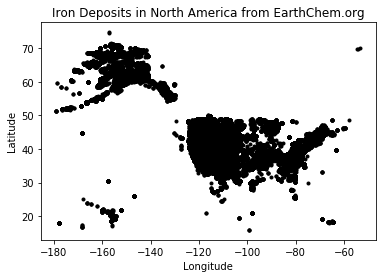

In [101]:
#setting US and Canada-specific map
#Lat: +15 to +90  Long: -180 to -50
#Restriction method adapted from method to remove outliers in Intro_Python_Geo

where_longitude_above_min = chemdata[:,1]>-180
cudata=chemdata[where_longitude_above_min]
where_longitude_below_max = cudata[:,1]<-50
cudata2=cudata[where_longitude_below_max]
cudata3=cudata2[cudata2[:,0]<90]
cudata4=cudata3[cudata3[:,0]>15]

#plot
plt.plot(cudata4[:,1],cudata4[:,0],'k.')
plt.title('Iron Deposits in North America from EarthChem.org')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

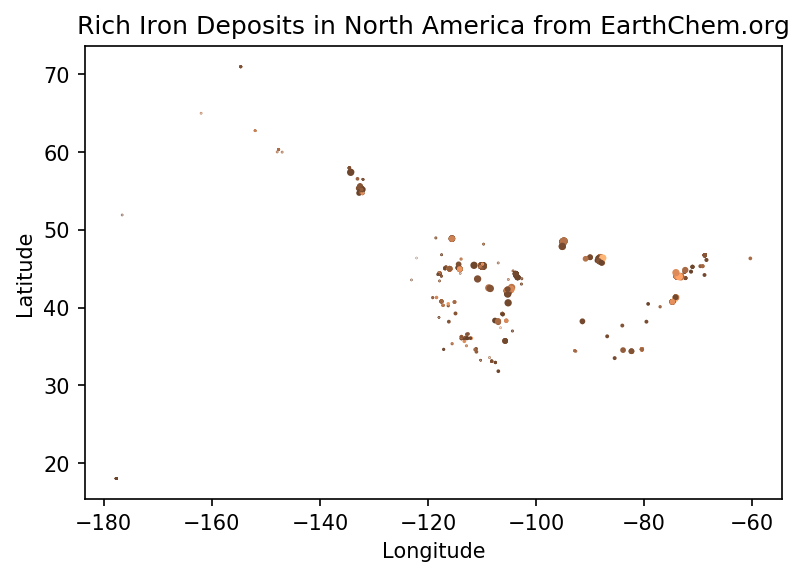

In [118]:
#plot
lats=cudata4[:,0]
longs=cudata4[:,1]
age=cudata4[:,2]
iron=cudata4[:,3]

#rich deposits
longs_rich=longs[iron>250000]
lats_rich=lats[iron>250000]
iron_rich=iron[iron>250000]
age_rich=age[iron>250000]

fig = plt.figure(figsize=(6,4),dpi=150)

plt.scatter(longs_rich,lats_rich,s=age_rich/500,c=iron_rich,vmin=0, vmax=770000,cmap=plt.cm.copper)
plt.title('Rich Iron Deposits in North America from EarthChem.org')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

In [113]:
print(age_rich.shape)

(87,)
